In [278]:
##The % sign indictes it is a magic command. In this case it shows visualization inline##
%matplotlib inline 

In [279]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot') ##This uses ggplot style.

In [280]:
##read in the csv file using pandas.

pd.read_csv('runners_check3.csv')

,name,country,age,sex,runner_Id,hours,minutes,seconds,place
0,Lelisa Desisa,ETH,28,M,3,2,5,59,1
1,Shura Kitata,ETH,22,M,2,2,6,1,2
2,Geoffrey Kamworor,KEN,25,M,1,2,6,26,3
3,Tamirat Tola,ETH,27,M,4,2,8,30,4
4,Daniel Wanjiru,KEN,26,M,5,2,10,21,5
5,Jared Ward,MAPLETON,30,M,15,2,12,24,6
6,Scott Fauble,FLAGSTAFF,26,M,18,2,12,28,7
7,Festus Talam,KEN,24,M,6,2,12,40,8
8,Shadrack Biwott,FOLSOM,33,M,11,2,12,52,9
9,Chris Derrick,PORTLAND,28,M,19,2,13,8,10


In [281]:
##remove the duplicate records until the bug in the code is fixed. 

with open('runners_check3.csv','r') as in_file, open('runners_nodup.csv','w') as out_file:
    seen = set() # set for fast O(1) amortized lookup
    for line in in_file:
        if line in seen: continue # skip duplicate

        seen.add(line)
        out_file.write(line)

In [282]:
runners=pd.read_csv('runners_nodup.csv')

In [99]:
#reset the index to runner_Id

#runners.reset_index()
#runners=runners.set_index('runner_Id')

In [283]:
##replace all country codes greater than 3 to USA. 

unique_values = runners['country'].unique()
state_list = []
for i in range(len(unique_values)):
    if len(unique_values[i]) > 3:
        state_list.append(unique_values[i])
#state_list

runners['country'] = runners['country'].replace(state_list, 'USA')

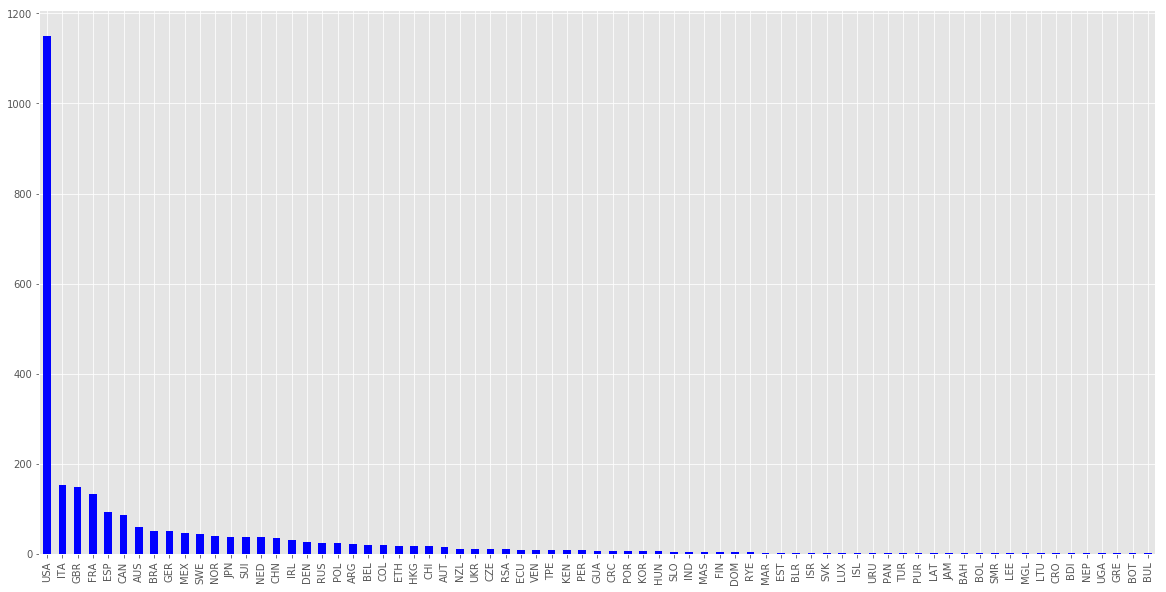

In [308]:
##create a bar plot of the number of runners by country. 

plt.figure(figsize=(20,10))

bar_df=runners['country'].value_counts()

bar_df.plot.bar(color='b')

#axs[0].bar(names, values)

#runners['country'].value_counts(sort=False) ###same code as above but with sort option.

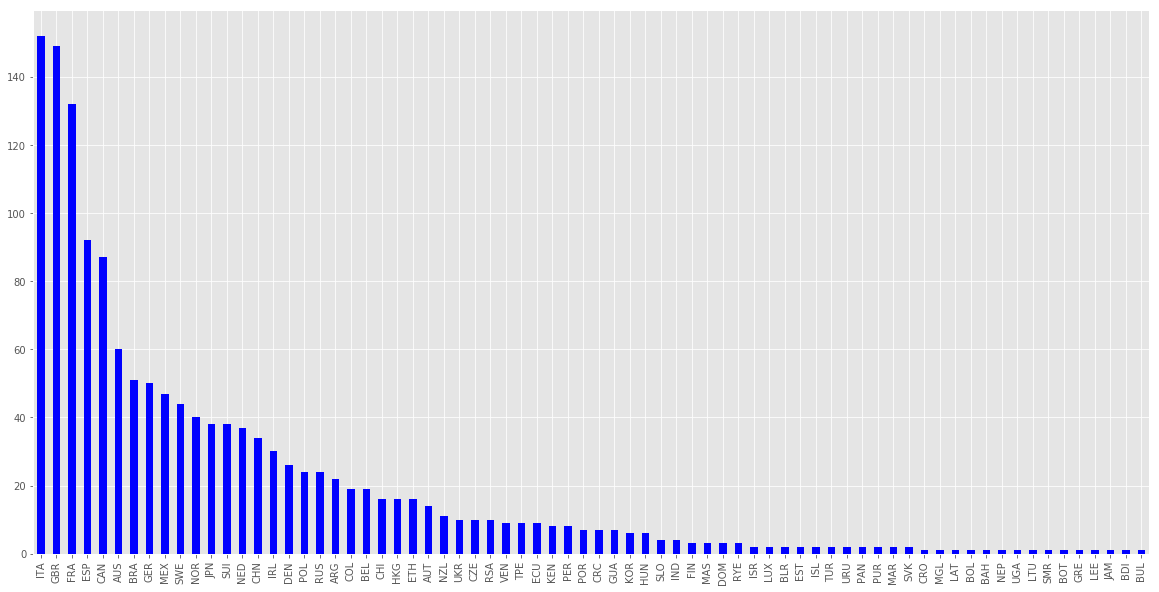

In [322]:
##Checking frequencies without the US:

us = ["USA"]

~runners.country.isin(us)  ##returns a boolean list. 
runnous=runners[(~runners.country.isin(us))] ##filters the dataset by just the east african countries and returns a subset of the dataset.


plt.figure(figsize=(20,10))
barnous=runnous['country'].value_counts()

barnous.plot.bar(color='b')

In [318]:
##filtering the dataset by specific values in a column, in this case to filter it for just the E.African countries.

eastafrica = ["ETH" ,"KEN", "UGA"]

runners.country.isin(eastafrica)  ##returns a boolean list. 
runeaf= runners[(runners.country.isin(eastafrica))] ##filters the dataset by just the east african countries and returns a subset of the dataset.

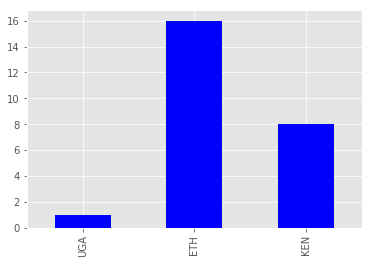

In [319]:
bar_eaf= runeaf['country'].value_counts(sort=False)
bar_eaf.plot.bar(color='b')

In [285]:
runners

,name,country,age,sex,runner_Id,hours,minutes,seconds,place
0,Lelisa Desisa,ETH,28,M,3,2,5,59,1
1,Shura Kitata,ETH,22,M,2,2,6,1,2
2,Geoffrey Kamworor,KEN,25,M,1,2,6,26,3
3,Tamirat Tola,ETH,27,M,4,2,8,30,4
4,Daniel Wanjiru,KEN,26,M,5,2,10,21,5
5,Jared Ward,USA,30,M,15,2,12,24,6
6,Scott Fauble,USA,26,M,18,2,12,28,7
7,Festus Talam,KEN,24,M,6,2,12,40,8
8,Shadrack Biwott,USA,33,M,11,2,12,52,9
9,Chris Derrick,USA,28,M,19,2,13,8,10


In [286]:
#recode the country variable to a dummy var for E Africa
def eastaf(country):
    if country == "ETH" or country=='KEN' or country=='UGA':
        return 1
    else:
        return 0

runners['east_africa'] = runners['country'].apply(eastaf)

runners['east_africa'].value_counts(sort=False)

0    2576
1      25
Name: east_africa, dtype: int64

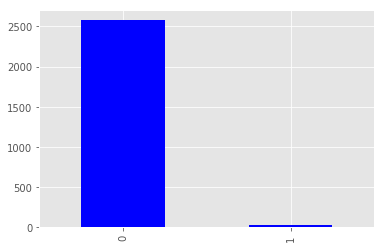

In [310]:
##create a bar plot of the runners from East Africa.

bar_ef= runners['east_africa'].value_counts(sort=False)
bar_ef.plot.bar(color='b')

In [287]:
#recode the country variable to a categorical var for each E African country
def eastafc(country):
    if country == "ETH":
        return 1
    elif country=='KEN':
        return 2
    elif country=='UGA':
        return 3
    else:
        return 0
    
runners['eastaf_country'] = runners['country'].apply(eastafc)
runners['eastaf_country'].value_counts(sort=False)

0    2576
2       8
1      16
3       1
Name: eastaf_country, dtype: int64

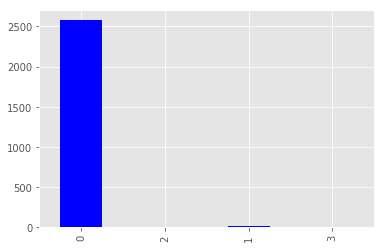

In [311]:
##create a bar plot of runners by each E.African country:

bar_eaf= runners['eastaf_country'].value_counts(sort=False)
bar_eaf.plot.bar(color='b')


In [288]:
##create a variable for each E.African country to get counts.

runners['eth'] = np.where(runners['country']=="ETH", 1, 0)
runners['ken'] = np.where(runners['country']=="KEN", 1, 0)
runners['uga'] = np.where(runners['country']=="UGA", 1, 0)


In [289]:
#recode the sex variable to a 0/1 dummy var
def sexdum(sex):
    if sex == "M":
        return 1
    else:
        return 0

runners['sex_dummy'] = runners['sex'].apply(sexdum)

runners['sex_dummy'].value_counts(sort=False)

0     293
1    2308
Name: sex_dummy, dtype: int64

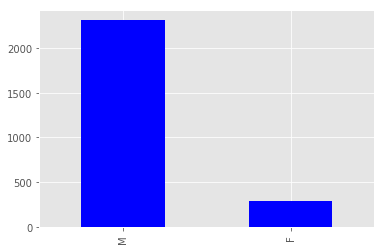

In [314]:
##create a graph for the sex dummy variable

bar_gen=runners['sex'].value_counts(sort=False)
bar_gen.plot.bar(color='b')

In [290]:
len(runners.country)

2601

In [291]:
runners.loc[runners.country=="ETH",:]

,name,country,age,sex,runner_Id,hours,minutes,seconds,place,east_africa,eastaf_country,eth,ken,uga,sex_dummy
0,Lelisa Desisa,ETH,28,M,3,2,5,59,1,1,1,1,0,0,1
1,Shura Kitata,ETH,22,M,2,2,6,1,2,1,1,1,0,0,1
3,Tamirat Tola,ETH,27,M,4,2,8,30,4,1,1,1,0,0,1
11,Tadesse Yae Dabi,ETH,29,M,443,2,13,57,12,1,1,1,0,0,1
18,Girma Bekele Gebre,ETH,25,M,440,2,18,18,19,1,1,1,0,0,1
19,Birhanu Dare Kemal,ETH,32,M,27,2,18,20,20,1,1,1,0,0,1
21,Suleman Abrar Shifa,ETH,25,M,444,2,19,45,22,1,1,1,0,0,1
22,Diriba Degefa Yigezu,ETH,30,M,446,2,20,1,23,1,1,1,0,0,1
23,Temesgen Habtemariam Bekele,ETH,28,M,448,2,20,16,24,1,1,1,0,0,1
38,Rahma Tusa,ETH,25,F,110,2,27,13,39,1,1,1,0,0,0


In [292]:
runners.loc[runners.country=="KEN",:]

,name,country,age,sex,runner_Id,hours,minutes,seconds,place,east_africa,eastaf_country,eth,ken,uga,sex_dummy
2,Geoffrey Kamworor,KEN,25,M,1,2,6,26,3,1,2,0,1,0,1
4,Daniel Wanjiru,KEN,26,M,5,2,10,21,5,1,2,0,1,0,1
7,Festus Talam,KEN,24,M,6,2,12,40,8,1,2,0,1,0,1
25,Mary Keitany,KEN,36,F,102,2,22,48,26,1,2,0,1,0,0
31,Vivian Cheruiyot,KEN,35,F,104,2,26,2,32,1,2,0,1,0,0
300,Duncan Nyasinga,KEN,39,M,3011,2,45,22,301,1,2,0,1,0,1
613,Marko Cheseto,KEN,35,M,1009,2,52,33,614,1,2,0,1,0,1
2437,Timothy Macharia,KEN,35,M,12042,3,13,5,"2,438",1,2,0,1,0,1


In [293]:
runners.loc[runners.country=="UGA",:]

,name,country,age,sex,runner_Id,hours,minutes,seconds,place,east_africa,eastaf_country,eth,ken,uga,sex_dummy
15,Harbert Okuti,UGA,33,M,28,2,16,51,16,1,3,0,0,1,1


In [294]:
runners.loc[runners.country=="USA",:]

,name,country,age,sex,runner_Id,hours,minutes,seconds,place,east_africa,eastaf_country,eth,ken,uga,sex_dummy
5,Jared Ward,USA,30,M,15,2,12,24,6,0,0,0,0,0,1
6,Scott Fauble,USA,26,M,18,2,12,28,7,0,0,0,0,0,1
8,Shadrack Biwott,USA,33,M,11,2,12,52,9,0,0,0,0,0,1
9,Chris Derrick,USA,28,M,19,2,13,8,10,0,0,0,0,0,1
12,Tim Ritchie,USA,31,M,12,2,15,22,13,0,0,0,0,0,1
13,Ryan Vail,USA,32,M,16,2,15,31,14,0,0,0,0,0,1
16,Scott Smith,USA,32,M,17,2,17,12,17,0,0,0,0,0,1
17,Bernard Lagat,USA,43,M,10,2,17,20,18,0,0,0,0,0,1
27,Jeremy Bennie,USA,24,M,1172,2,23,16,28,0,0,0,0,0,1
30,Derrick Hamel,USA,35,M,1188,2,25,43,31,0,0,0,0,0,1


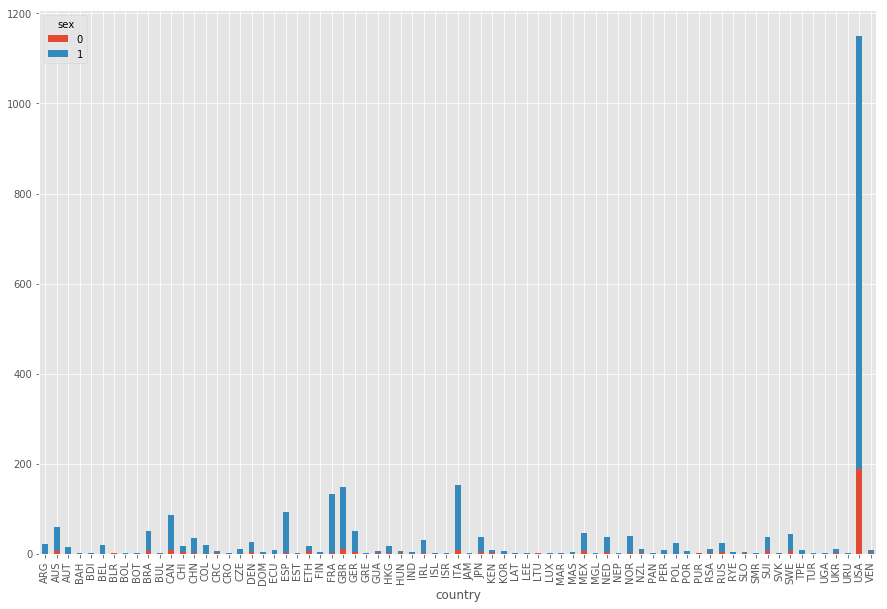

In [344]:
## women runners by country:


sexcross = pd.crosstab(runners.country, runners.sex_dummy, rownames=['country'], colnames=['sex_dummy'])


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print("Current size: ", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

#plt.figure(figsize=(30,60))

sexcross.plot.bar(stacked=True)
plt.legend(title='sex')

In [296]:
runners.agg(['min', 'max', 'mean', 'median', 'std'])['age']

min       18.000000
max       63.000000
mean      37.348712
median    37.000000
std        8.159014
Name: age, dtype: float64

In [297]:
##create a dataframe of the first top 50 and top 25 finishers

type(runners['place'])

runners.place = pd.to_numeric(runners.place, errors='coerce')

runner50=runners[runners['place']<51] ##top 50 finishers

runner25=runners[runners['place']<26] ##top 25 finishers

runner10=runners[runners['place']<11] ##top 10 finishers

runner5=runners[runners['place']<6] ##top 5 finishers


In [298]:
runner50

,name,country,age,sex,runner_Id,hours,minutes,seconds,place,east_africa,eastaf_country,eth,ken,uga,sex_dummy
0,Lelisa Desisa,ETH,28,M,3,2,5,59,1.0,1,1,1,0,0,1
1,Shura Kitata,ETH,22,M,2,2,6,1,2.0,1,1,1,0,0,1
2,Geoffrey Kamworor,KEN,25,M,1,2,6,26,3.0,1,2,0,1,0,1
3,Tamirat Tola,ETH,27,M,4,2,8,30,4.0,1,1,1,0,0,1
4,Daniel Wanjiru,KEN,26,M,5,2,10,21,5.0,1,2,0,1,0,1
5,Jared Ward,USA,30,M,15,2,12,24,6.0,0,0,0,0,0,1
6,Scott Fauble,USA,26,M,18,2,12,28,7.0,0,0,0,0,0,1
7,Festus Talam,KEN,24,M,6,2,12,40,8.0,1,2,0,1,0,1
8,Shadrack Biwott,USA,33,M,11,2,12,52,9.0,0,0,0,0,0,1
9,Chris Derrick,USA,28,M,19,2,13,8,10.0,0,0,0,0,0,1


In [299]:
runner25

,name,country,age,sex,runner_Id,hours,minutes,seconds,place,east_africa,eastaf_country,eth,ken,uga,sex_dummy
0,Lelisa Desisa,ETH,28,M,3,2,5,59,1.0,1,1,1,0,0,1
1,Shura Kitata,ETH,22,M,2,2,6,1,2.0,1,1,1,0,0,1
2,Geoffrey Kamworor,KEN,25,M,1,2,6,26,3.0,1,2,0,1,0,1
3,Tamirat Tola,ETH,27,M,4,2,8,30,4.0,1,1,1,0,0,1
4,Daniel Wanjiru,KEN,26,M,5,2,10,21,5.0,1,2,0,1,0,1
5,Jared Ward,USA,30,M,15,2,12,24,6.0,0,0,0,0,0,1
6,Scott Fauble,USA,26,M,18,2,12,28,7.0,0,0,0,0,0,1
7,Festus Talam,KEN,24,M,6,2,12,40,8.0,1,2,0,1,0,1
8,Shadrack Biwott,USA,33,M,11,2,12,52,9.0,0,0,0,0,0,1
9,Chris Derrick,USA,28,M,19,2,13,8,10.0,0,0,0,0,0,1


In [300]:
runner50['country'].value_counts(sort=False)

UGA     1
LEE     1
ITA     1
KEN     5
GER     1
GBR     5
ETH    10
GUA     1
BEL     1
USA    21
MEX     1
PUR     1
Name: country, dtype: int64

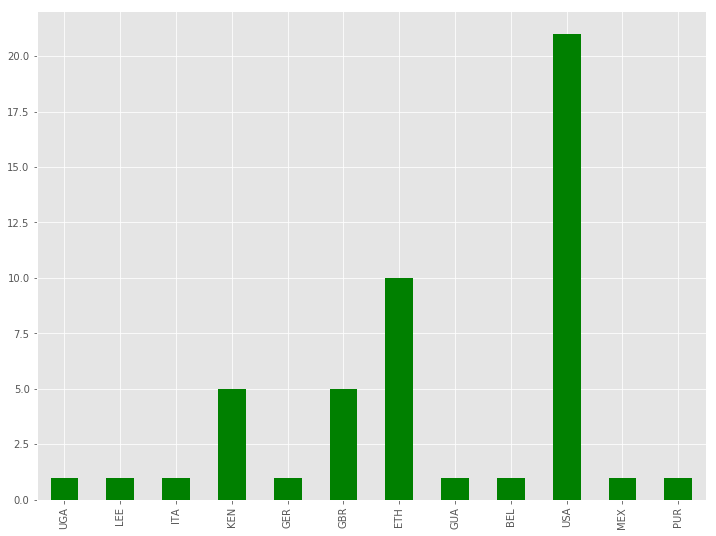

In [338]:
bar50=runner50['country'].value_counts(sort=False)
bar50.plot.bar(color='g')

In [301]:
runner25['country'].value_counts(sort=False)

UGA    1
KEN    3
GBR    2
ETH    9
USA    8
MEX    1
PUR    1
Name: country, dtype: int64

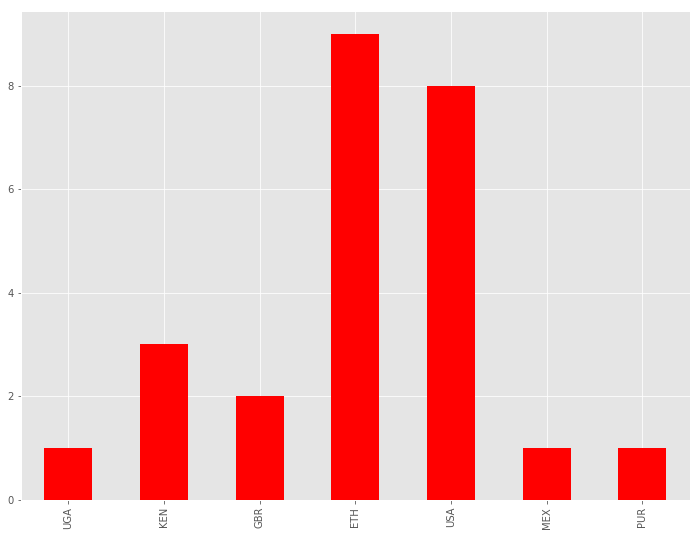

In [341]:
bar25=runner25['country'].value_counts(sort=False)
bar25.plot.bar(color='r')

In [302]:
runner10['country'].value_counts(sort=False)

USA    4
ETH    3
KEN    3
Name: country, dtype: int64

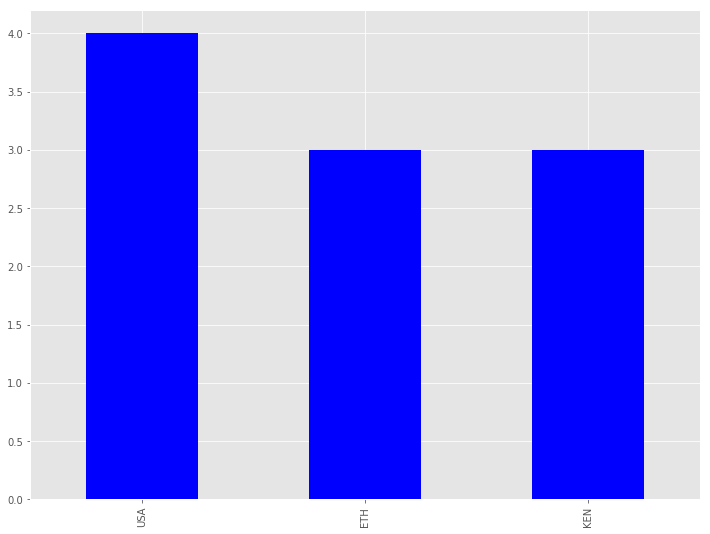

In [342]:
bar10=runner10['country'].value_counts(sort=False)
bar10.plot.bar(color='b')

In [303]:
runner5['country'].value_counts(sort=False)

ETH    3
KEN    2
Name: country, dtype: int64

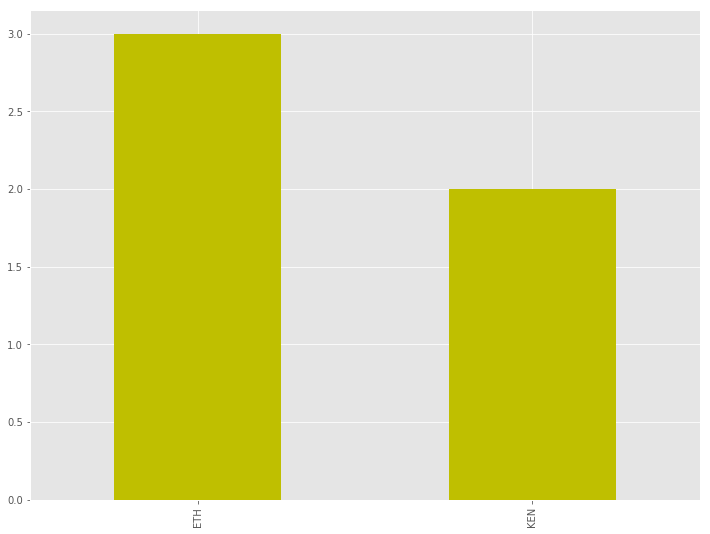

In [343]:
bar5=runner5['country'].value_counts(sort=False)
bar5.plot.bar(color='y')

In [346]:
toteastaf = runners['east_africa'].sum()
toteastaf

tot50eastaf = runner50['east_africa'].sum()
tot25eastaf = runner25['east_africa'].sum()
tot10eastaf = runner10['east_africa'].sum()
tot5eastaf = runner5['east_africa'].sum()

#Total = df['MyColumn'].sum()

In [347]:
toteastaf

25

In [348]:
tot50eastaf

16

In [349]:
tot25eastaf

13

In [350]:
tot10eastaf

6

In [351]:
tot5eastaf

5

In [366]:
#Proportion of east african runners in top 50 out of 50 and of all east African runners:
prop50 = (tot50eastaf/50)*100
prop50eaf = (tot50eastaf/toteastaf)*100

##proportion east african runners in top 25
prop25= (tot25eastaf/25)*100
prop25eaf=(tot25eastaf/toteastaf)*100


##proportion east african runners in top 10
prop10= (tot10eastaf/10)*100
prop10eaf=(tot10eastaf/toteastaf)*100

##proportion east african runners in top 5
prop5= (tot5eastaf/5)*100
prop5eaf=(tot5eastaf/toteastaf)*100

In [372]:
prop50
prop50eaf

64.0

In [377]:
#prop25
prop25eaf

52.0

In [380]:
prop10
prop10eaf

24.0

In [389]:
prop5
prop5eaf

20.0

<BarContainer object of 8 artists>

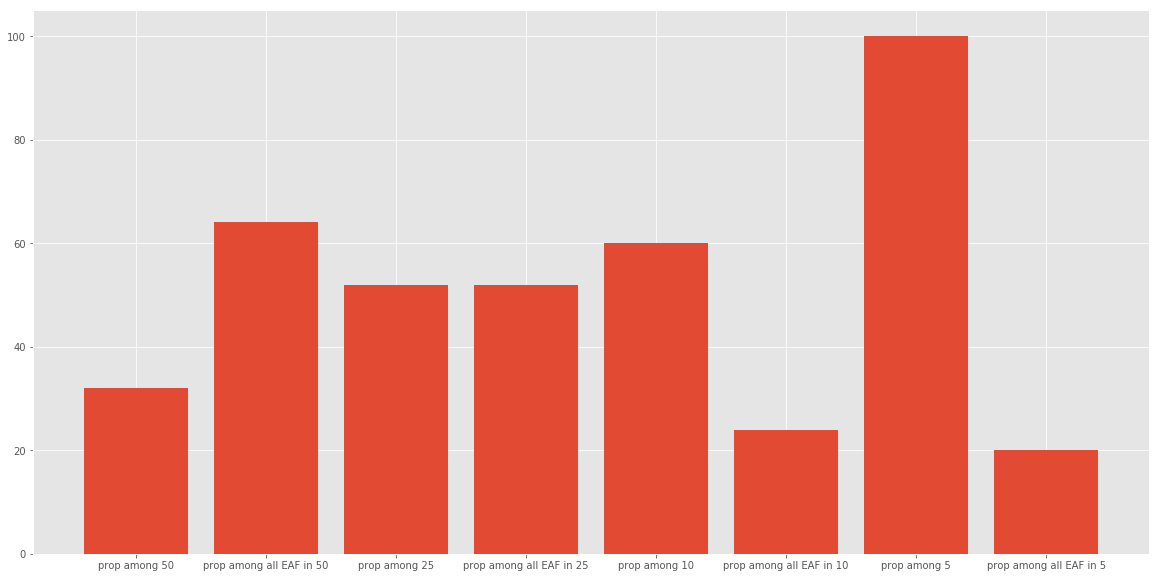

In [393]:
data = {'prop among 50': 32, 'prop among all EAF in 50': 64, 'prop among 25': 52, 'prop among all EAF in 25': 52, 
        'prop among 10': 60, 'prop among all EAF in 10': 24, 'prop among 5': 100, 'prop among all EAF in 5': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharey=False)
axs.bar(names, values)
#axs[1].scatter(names, values)
#axs[2].plot(names, values)
#fig.suptitle('Categorical Plotting')